# MACHINE LEARNING: BÀI THỰC HÀNH SỐ 4 – PHẦN 1

## PHÂN TÍCH THÀNH PHẦN CHÍNH (PRINCIPAL COMPONENTS ANALYSIS - PCA)

### Ví dụ 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import datasets
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Read csv data file, change to your location
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/iris.csv")

# Show data information
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [6]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


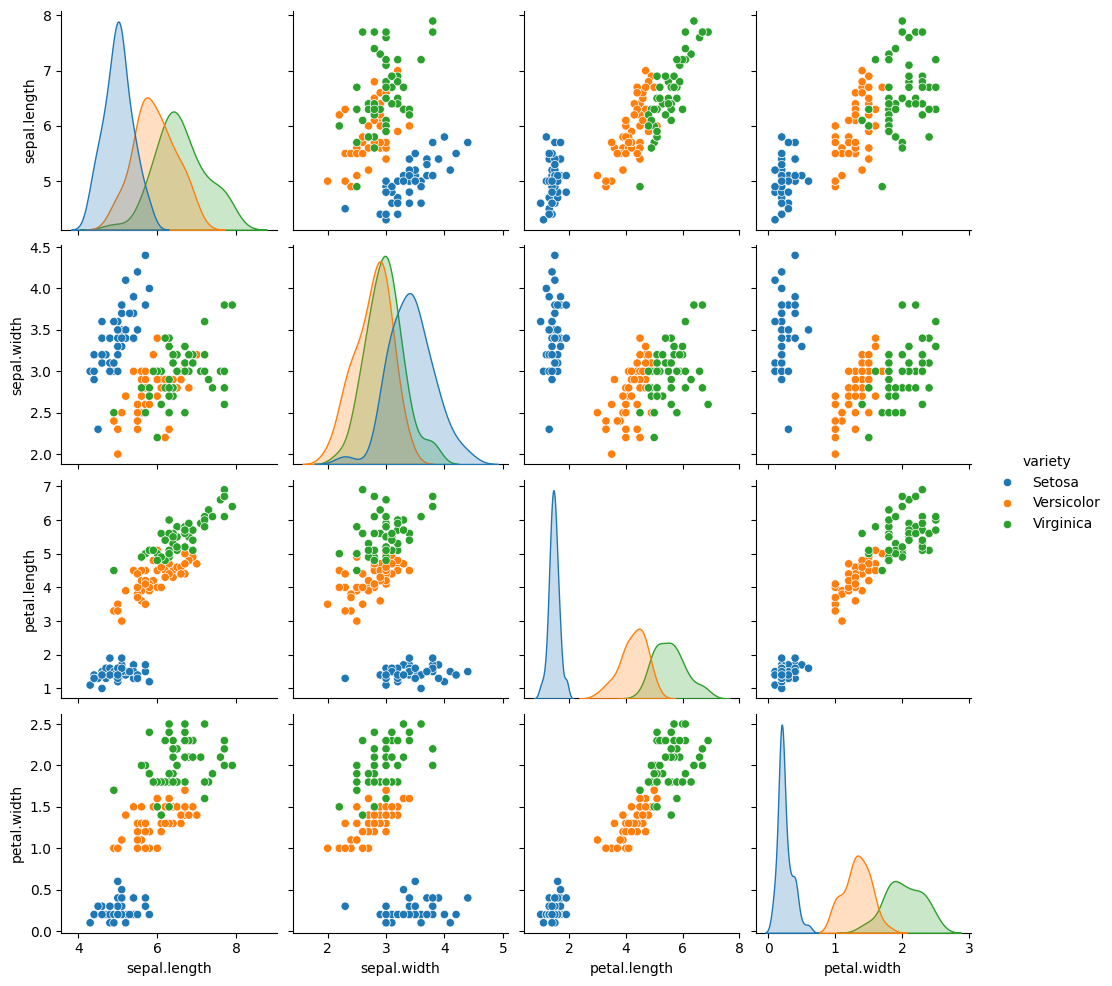

In [7]:
# Vẽ biểu đồ cặp
sns.pairplot(df, hue='variety')

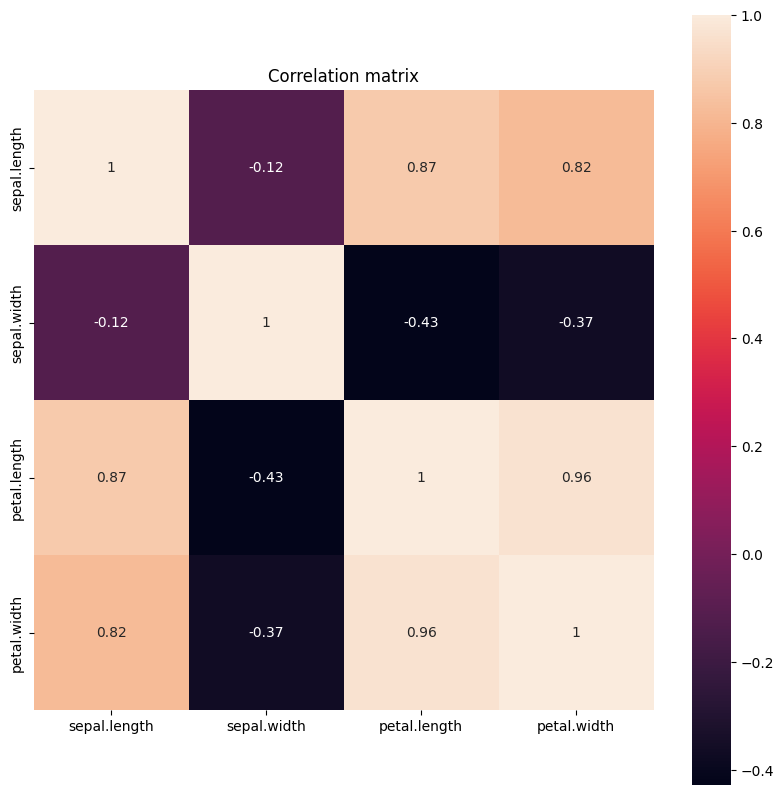

In [9]:
# Chuẩn hóa dữ liệu và tính ma trận hiệp phương sai
species = df["variety"].tolist()
X = df.drop("variety", axis=1)

# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)

# Calculating the correlation matrix of the data
X_corr = (1 / 150) * X.T.dot(X)

# Plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True, annot=True)
plt.title('Correlation matrix')
plt.show()

In [10]:
# Tính toán hệ riêng của ma trận hiệp phương sai bằng SVD và Eig

# Method 1: Using SVD
u, s, v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u

print("Eigenvalues (SVD):", eig_values)
print("Eigenvectors (SVD):", eig_vectors)

Eigenvalues (SVD): [2.91849782 0.91403047 0.14675688 0.02071484]
Eigenvectors (SVD): [[-0.52106591 -0.37741762  0.71956635  0.26128628]
 [ 0.26934744 -0.92329566 -0.24438178 -0.12350962]
 [-0.5804131  -0.02449161 -0.14212637 -0.80144925]
 [-0.56485654 -0.06694199 -0.63427274  0.52359713]]


In [11]:
# Method 2: Using eig
eig_values2, eig_vectors2 = np.linalg.eig(X_corr)

print("Eigenvalues (Eig):", eig_values2)
print("Eigenvectors (Eig):", eig_vectors2)

Eigenvalues (Eig): [2.91849782 0.91403047 0.14675688 0.02071484]
Eigenvectors (Eig): [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


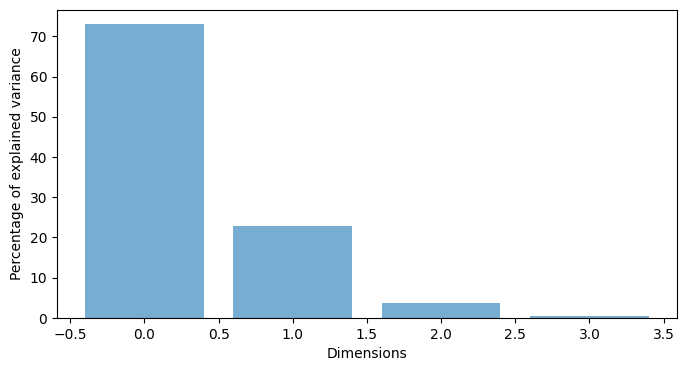

In [12]:
# Hiển thị mức độ quan trọng của các trường dữ liệu
explained_variance = (eig_values / np.sum(eig_values)) * 100
plt.figure(figsize=(8,4))
plt.bar(range(4), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')
plt.show()

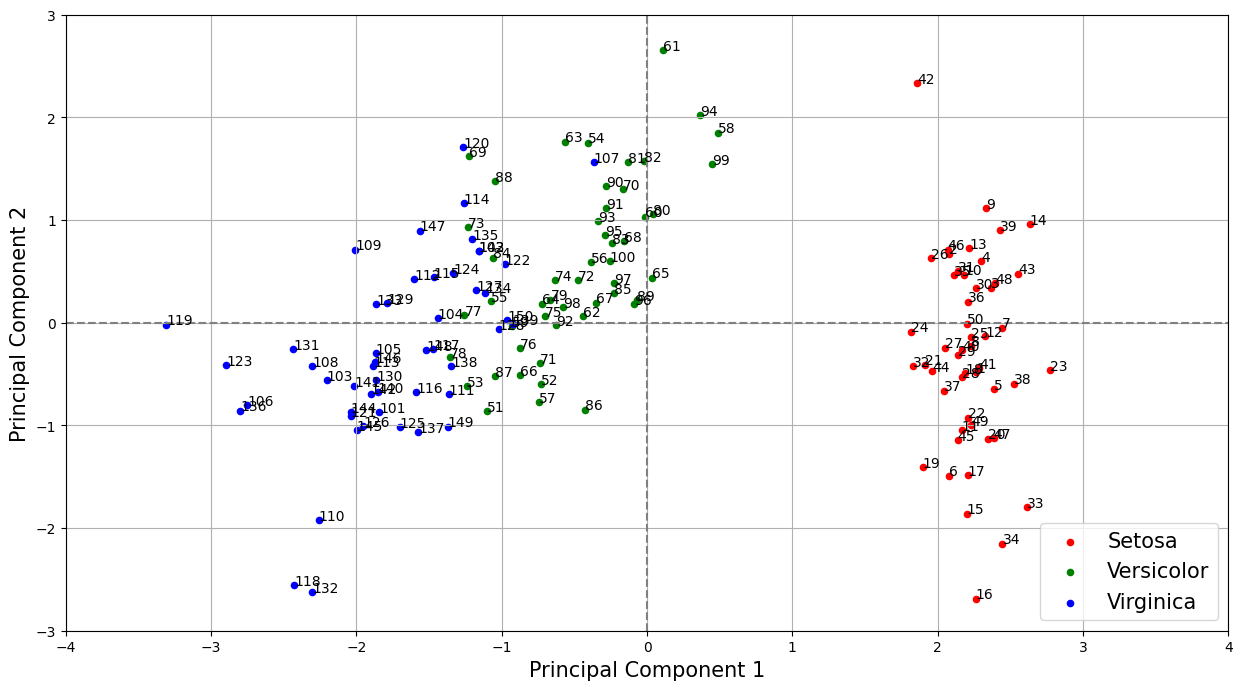

In [13]:
# Chiếu dữ liệu xuống không gian con 2 chiều
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])

# Hàm vẽ biểu đồ trong không gian 2 chiều
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))

    species_unique = list(set(species))
    species_colors = ["r","b","g"]

    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label=spec, s=20, c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i+1), (pc1[i],pc2[i]))

    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)

    ax.set_xlabel('Principal Component 1', fontsize=15)
    ax.set_ylabel('Principal Component 2', fontsize=15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")

    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()

plot_scatter(pc1, pc2)

1) Sử dụng đoạn code chọn số chiều chính trong ví dụ 2, đưa tập dữ liệu đã đọc về còn 2 chiều, sau đó hiển thị lên màn hình để xem quan hệ giữa các lớp dữ liệu.

<ipython-input-18-0fa4f6e725e0>:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


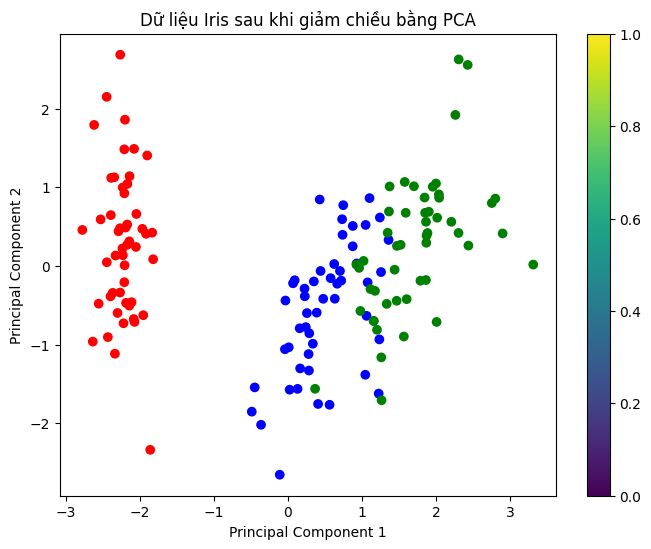

In [18]:
# Tách cột species (lớp) khỏi dữ liệu
species = df["variety"].tolist()
X = df.drop("variety", axis=1)

# Chuẩn hóa dữ liệu
X = StandardScaler().fit_transform(X)

# Khởi tạo PCA với n_components = 2
pca = PCA(n_components=2)

# Fit và transform dữ liệu
principalComponents = pca.fit_transform(X)

# Tạo DataFrame từ dữ liệu sau khi giảm chiều
principalDf = pd.DataFrame(
    data=principalComponents,
    columns=["principal component 1", "principal component 2"],
)

# Hiển thị dữ liệu sau khi giảm chiều
# print(principalDf.head())

species_colors = {
    "Setosa": "red",
    "Versicolor": "blue",
    "Virginica": "green",
}

# Vẽ biểu đồ scatter plot của dữ liệu 2 chiều sau khi giảm chiều
plt.figure(figsize=(8, 6))
plt.scatter(
    principalDf["principal component 1"],
    principalDf["principal component 2"],
    c=[species_colors[s] for s in species],
    cmap="viridis",
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Dữ liệu Iris sau khi giảm chiều bằng PCA")
plt.colorbar()
plt.show()

2) Với đoạn chương trình đọc dữ liệu đã có, hãy chạy lại ví dụ này với các thư viện của gói linear_model, lớp LogisticRegression và so sánh kết quả, chia Train:Test = 4:1.

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Tách cột species (lớp) khỏi dữ liệu
y = df["variety"]
X = df.drop("variety", axis=1)

# a. Phân loại với dữ liệu gốc
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy (dữ liệu gốc): {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix (dữ liệu gốc):\n {confusion_matrix(y_test, y_pred)}")

# b. Phân loại với dữ liệu giảm chiều
# i. Chia dữ liệu thành Train - Test, sau đó giảm chiều và phân loại
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
model = LogisticRegression()
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)
print(
    f"Accuracy (giảm chiều trước): {accuracy_score(y_test, y_pred_pca)}"
)
print(
    f"Confusion Matrix (giảm chiều trước):\n {confusion_matrix(y_test, y_pred_pca)}"
)

# ii. Giảm chiều trên toàn bộ dữ liệu, sau đó chia thành Train - Test và phân loại
scaler = StandardScaler()
X = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)
model = LogisticRegression()
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)
print(
    f"Accuracy (giảm chiều sau): {accuracy_score(y_test, y_pred_pca)}"
)
print(
    f"Confusion Matrix (giảm chiều sau):\n {confusion_matrix(y_test, y_pred_pca)}"
)

Accuracy (dữ liệu gốc): 0.9666666666666667
Confusion Matrix (dữ liệu gốc):
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Accuracy (giảm chiều trước): 0.9
Confusion Matrix (giảm chiều trước):
 [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]
Accuracy (giảm chiều sau): 0.9
Confusion Matrix (giảm chiều sau):
 [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]


### Ví dụ 2

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/pd_speech_features.csv')

df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [23]:
df['class'].value_counts()

class
1    564
0    192
Name: count, dtype: int64

1) Sử dụng PCA để giữ lại 200 thành phần chính của dữ liệu

In [24]:
X = df.drop('class', axis=1)
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=200)
result = pca.fit_transform(X)

2) Chia dữ liệu thành 500 bản ghi training và phần còn lại cho Test. Sau đó sử dụng mô hình hồi quy Logistic để dự đoán phân loại dữ liệu cho phần Test.

In [25]:
X_train = result[:500]
X_test = result[500:]
y_train = df['class'][:500]
y_test = df['class'][500:]

model = LogisticRegression(max_iter=10000, random_state=2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

3) Sử dụng độ đo tính chính xác trong sklearn để kiểm tra kết quả.

In [26]:
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.796875


### Bài tập thực hành 1

class
1    564
0    192
Name: count, dtype: int64


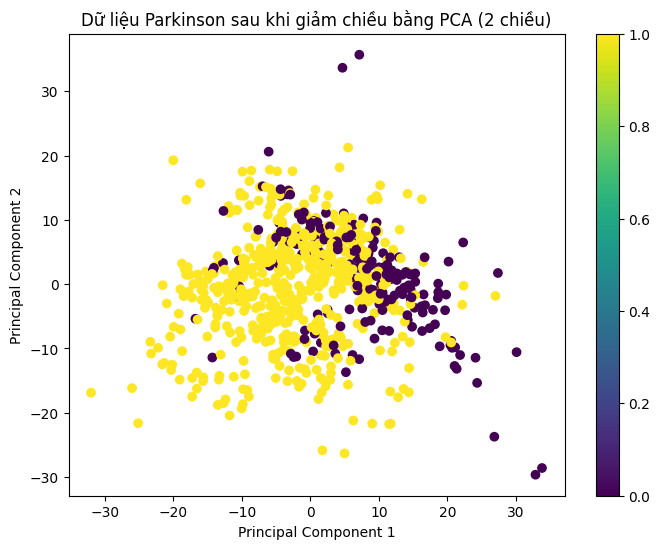

In [27]:
# 1. Đọc dữ liệu
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/pd_speech_features.csv')
print(df['class'].value_counts())

# Chuẩn bị dữ liệu
X = df.drop('class', axis=1)
y = df['class']

# 2. Giảm chiều xuống 2 và trực quan hóa
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Dữ liệu Parkinson sau khi giảm chiều bằng PCA (2 chiều)')
plt.colorbar()
plt.show()

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 3. Giảm chiều xuống 200 và phân loại
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
model = LogisticRegression()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

print(f"Accuracy (Giảm chiều trước khi chia Train-Test): {accuracy_score(y_test, y_pred)}")
print(f"Classification Report (Giảm chiều trước khi chia Train-Test):\n {classification_report(y_test, y_pred)}")
print(f"Confusion Matrix (Giảm chiều trước khi chia Train-Test):\n {confusion_matrix(y_test, y_pred)}")

Accuracy (Giảm chiều trước khi chia Train-Test): 0.8201058201058201
Classification Report (Giảm chiều trước khi chia Train-Test):
               precision    recall  f1-score   support

           0       0.67      0.58      0.62        48
           1       0.86      0.90      0.88       141

    accuracy                           0.82       189
   macro avg       0.77      0.74      0.75       189
weighted avg       0.81      0.82      0.82       189

Confusion Matrix (Giảm chiều trước khi chia Train-Test):
 [[ 28  20]
 [ 14 127]]


In [30]:
# 4. Giảm chiều sau khi chia Train-Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
model = LogisticRegression()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

print(f"Accuracy (Giảm chiều sau khi chia Train-Test): {accuracy_score(y_test, y_pred)}")
print(f"Classification Report (Giảm chiều sau khi chia Train-Test):\n {classification_report(y_test, y_pred)}")
print(f"Confusion Matrix (Giảm chiều sau khi chia Train-Test):\n {confusion_matrix(y_test, y_pred)}")

Accuracy (Giảm chiều sau khi chia Train-Test): 0.8095238095238095
Classification Report (Giảm chiều sau khi chia Train-Test):
               precision    recall  f1-score   support

           0       0.64      0.58      0.61        48
           1       0.86      0.89      0.87       141

    accuracy                           0.81       189
   macro avg       0.75      0.73      0.74       189
weighted avg       0.80      0.81      0.81       189

Confusion Matrix (Giảm chiều sau khi chia Train-Test):
 [[ 28  20]
 [ 16 125]]


In [31]:
# 5. Giảm chiều với ngưỡng phương sai được giữ lại 80%
pca = PCA(n_components=0.8, svd_solver='full')
pca.fit(X_scaled)
X_pca_80 = pca.transform(X_scaled)
print(f"Số chiều sau khi giảm với ngưỡng 80% phương sai: {X_pca_80.shape[1]}")
X_train, X_test, y_train, y_test = train_test_split(X_pca_80, y, test_size=0.25, random_state=42, stratify=y)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy (Giảm chiều với ngưỡng 80%): {accuracy_score(y_test, y_pred)}")
print(f"Classification Report (Giảm chiều với ngưỡng 80%):\n {classification_report(y_test, y_pred)}")
print(f"Confusion Matrix (Giảm chiều với ngưỡng 80%):\n {confusion_matrix(y_test, y_pred)}")

Số chiều sau khi giảm với ngưỡng 80% phương sai: 61
Accuracy (Giảm chiều với ngưỡng 80%): 0.8042328042328042
Classification Report (Giảm chiều với ngưỡng 80%):
               precision    recall  f1-score   support

           0       0.62      0.58      0.60        48
           1       0.86      0.88      0.87       141

    accuracy                           0.80       189
   macro avg       0.74      0.73      0.74       189
weighted avg       0.80      0.80      0.80       189

Confusion Matrix (Giảm chiều với ngưỡng 80%):
 [[ 28  20]
 [ 17 124]]


In [33]:
from sklearn.naive_bayes import GaussianNB

# 6. So sánh Naive Bayes và Logistic Regression
# Dữ liệu gốc
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

print("\nKết quả trên dữ liệu gốc:")
print(f"Accuracy (Logistic Regression): {accuracy_score(y_test, y_pred_lr)}")
print(f"Accuracy (Naive Bayes): {accuracy_score(y_test, y_pred_nb)}")

# Dữ liệu giảm chiều (sử dụng số chiều từ bước 5)
X_train, X_test, y_train, y_test = train_test_split(X_pca_80, y, test_size=0.25, random_state=42, stratify=y)

# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

print("\nKết quả trên dữ liệu giảm chiều:")
print(f"Accuracy (Logistic Regression): {accuracy_score(y_test, y_pred_lr)}")
print(f"Accuracy (Naive Bayes): {accuracy_score(y_test, y_pred_nb)}")


Kết quả trên dữ liệu gốc:
Accuracy (Logistic Regression): 0.8359788359788359
Accuracy (Naive Bayes): 0.7513227513227513

Kết quả trên dữ liệu giảm chiều:
Accuracy (Logistic Regression): 0.8042328042328042
Accuracy (Naive Bayes): 0.7936507936507936


### Ví dụ 3

1) Đọc dữ liệu ảnh, lấy tập dữ liệu 5000 ảnh bất kỳ; giảm số chiều dữ liệu xuống còn 100 chiều (từ 28x28 = 784 chiều ban đầu).

In [34]:
# set names to the paths because they're too long
data_path = '/content/drive/MyDrive/Machine Learning/handwritting/'

# train path
train_images_path = data_path + 'train-images-idx3-ubyte.gz'
train_labels_path = data_path + 'train-labels-idx1-ubyte.gz'
# test path

test_images_path = data_path + 't10k-images-idx3-ubyte.gz'
test_labels_path = data_path + 't10k-labels-idx1-ubyte.gz'

In [38]:
import gzip
from sklearn.metrics import accuracy_score, log_loss

def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    Đọc dữ liệu ảnh và nhãn từ file gzip.
    """
    with gzip.open(images_path, 'r') as f_images:
        f_images.read(16)
        real_num = num_images if not shuffle else (60000 if _is else 10000)
        buf_images = f_images.read(image_size * image_size * real_num)
        images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
        images = images.reshape(real_num, image_size, image_size)

    with gzip.open(labels_path, 'r') as f_labels:
        f_labels.read(8)
        labels = np.zeros((real_num)).astype(np.int64)
        for i in range(real_num):
            buf_labels = f_labels.read(1)
            labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    if shuffle:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id]

    images = images.reshape(num_images, image_size * image_size) / 255.0
    return images, labels


def convert_labels(y, C):
    """Chuyển đổi nhãn sang dạng one-hot encoding."""
    return sparse.coo_matrix(
        (np.ones_like(y), (y, np.arange(len(y)))), shape=(C, len(y))
    ).toarray()


def softmax(Z):
    """Hàm softmax."""
    e_Z = np.exp(Z)
    return e_Z / e_Z.sum(axis=0)


def softmax_stable(Z):
    """Hàm softmax ổn định hơn."""
    e_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return e_Z / e_Z.sum(axis=0)


def pred(W, X):
    """Dự đoán nhãn dựa trên trọng số W."""
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis=0)


def _softmax_regression(X, Y, theta, lambda_=0.5, iterations=20, learning_rate=1e-5, batch_size=200):
    """Huấn luyện mô hình Multinomial Logistic Regression."""
    losses = []
    _theta = theta
    d, N = X.shape
    for iter_ in range(iterations):
        for i in range(N):
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(10, 1)
            ai = softmax_stable(np.dot(_theta.T, xi))
            _theta += learning_rate * xi.dot((yi - ai).T)
            if (iter_ * N + i) % batch_size == 0:
                Y_hat = np.dot(_theta.T, X)
                losses.append(log_loss(Y, Y_hat))
        Y_hat = np.dot(_theta.T, X)
        print(f"epoch {iter_} - cost {log_loss(Y, Y_hat) / N:.4f}")
    return _theta, losses

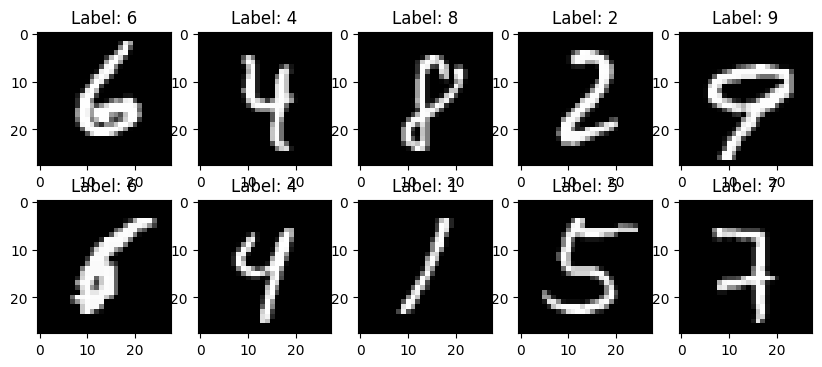

In [39]:
# Đọc dữ liệu
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels = get_mnist_data(test_images_path, test_labels_path, 10000, _is=False, shuffle=True)

# Hiển thị một số ảnh mẫu
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
plt.show()

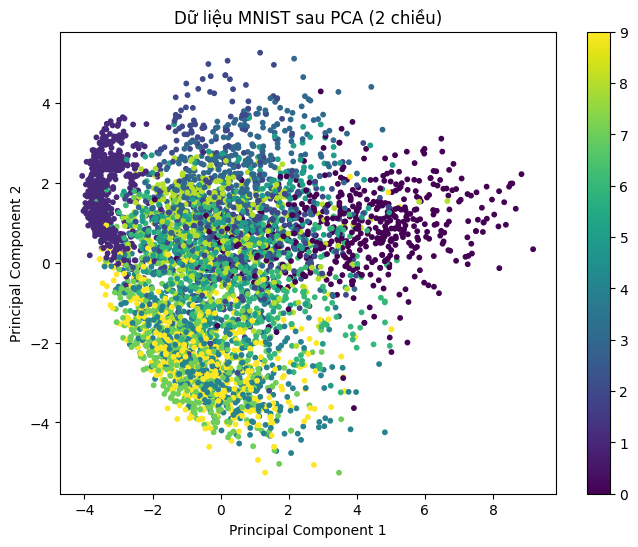

In [40]:
# Chuẩn hóa dữ liệu
X_train = train_images
X_test = test_images
y_train = train_labels
y_test = test_labels

# 1. Giảm chiều dữ liệu với PCA (2 chiều)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Trực quan hóa dữ liệu sau khi giảm chiều
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Dữ liệu MNIST sau PCA (2 chiều)')
plt.colorbar()
plt.show()

In [41]:
import time

# 2. Huấn luyện mô hình Multinomial Logistic Regression trên dữ liệu 2 chiều
model_pca = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
start_time = time.time()
model_pca.fit(X_train_pca, y_train)
end_time = time.time()
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(
    f"Accuracy (PCA - 2D): {accuracy_pca:.4f}, Training Time: {end_time - start_time:.4f}s"
)

Accuracy (PCA - 2D): 0.4494, Training Time: 0.1668s


In [42]:
# 3. Huấn luyện mô hình Multinomial Logistic Regression trên dữ liệu gốc
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Original): {accuracy:.4f}, Training Time: {end_time - start_time:.4f}s")

Accuracy (Original): 0.8966, Training Time: 9.9791s


In [44]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# 4. So sánh với mô hình Naive Bayes
# a. Gaussian Naive Bayes
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
y_pred_gnb = model_gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Accuracy (GaussianNB): {accuracy_gnb:.4f}")

# b. Multinomial Naive Bayes
model_mnb = MultinomialNB()
model_mnb.fit(X_train, y_train)
y_pred_mnb = model_mnb.predict(X_test)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Accuracy (MultinomialNB): {accuracy_mnb:.4f}")

Accuracy (GaussianNB): 0.5481
Accuracy (MultinomialNB): 0.8303


### Ví dụ 4

In [47]:
import cv2
import os

In [51]:
# 1. Chuẩn bị dữ liệu
path = '/content/drive/MyDrive/face_data/'

ids = range(1, 16)
states = ['centerlight', 'glasses', 'happy', 'leftlight', 'noglasses', 'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink']
prefix = 'subject'
surfix = '.png'

# Đọc kích thước ảnh
fn = os.path.join(path, f"{prefix}{ids[0]:02d}.{states[0]}{surfix}")
im = cv2.imread(fn, 0)

h = im.shape[0] # hight
w = im.shape[1] # width
D = h * w
N = len(states)*15
print(N, D, h, w)

# Đọc dữ liệu ảnh
X = np.zeros((len(ids) * len(states), D))
y = np.zeros(len(ids) * len(states), dtype=int)
count = 0
for person_id in ids:
    for i, state in enumerate(states):
        fn = os.path.join(data_path, f"{prefix}{person_id:02d}.{state}{surfix}")
        im = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
        X[count, :] = im.reshape(D)
        y[count] = person_id - 1
        count += 1

# Chia Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
# 2. Giảm chiều dữ liệu
# a. Chuẩn hóa
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# b. PCA
pca = PCA(n_components=500)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# 3. Phân loại
# a. Multinomial Logistic Regression
model_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_lr.fit(X_train_pca, y_train)
y_pred_lr = model_lr.predict(X_test_pca)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy (Logistic Regression): {accuracy_lr:.4f}")

# b. Gaussian Naive Bayes
model_gnb = GaussianNB()
model_gnb.fit(X_train_pca, y_train)
y_pred_gnb = model_gnb.predict(X_test_pca)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Accuracy (Gaussian Naive Bayes): {accuracy_gnb:.4f}")

In [ ]:
# 4. Kiểm tra với ảnh mới
new_images_path = '/content/drive/MyDrive/face_data/'
new_images = []
for i in range(5):
    fn = os.path.join(new_images_path, f"new_image_{i+1}.png") # Thay đổi tên file cho phù hợp
    im = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
    im = cv2.resize(im, (w, h))  # Resize ảnh mới cho cùng kích thước
    new_images.append(im.reshape(D))

# Chuyển đổi sang numpy array
new_images = np.array(new_images)

# Chuẩn hóa và giảm chiều dữ liệu
new_images = scaler.transform(new_images)
new_images_pca = pca.transform(new_images)

# Dự đoán nhãn cho ảnh mới
new_pred_lr = model_lr.predict(new_images_pca)
new_pred_gnb = model_gnb.predict(new_images_pca)

print(f"Dự đoán (Logistic Regression): {new_pred_lr}")
print(f"Dự đoán (Gaussian Naive Bayes): {new_pred_gnb}")